/home/andreas/miniconda3/envs/genaiadvisor/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] Loading cached data for MSFT from /home/andreas/Software/genaiadvisor/code/data/MSFT_10y.csv


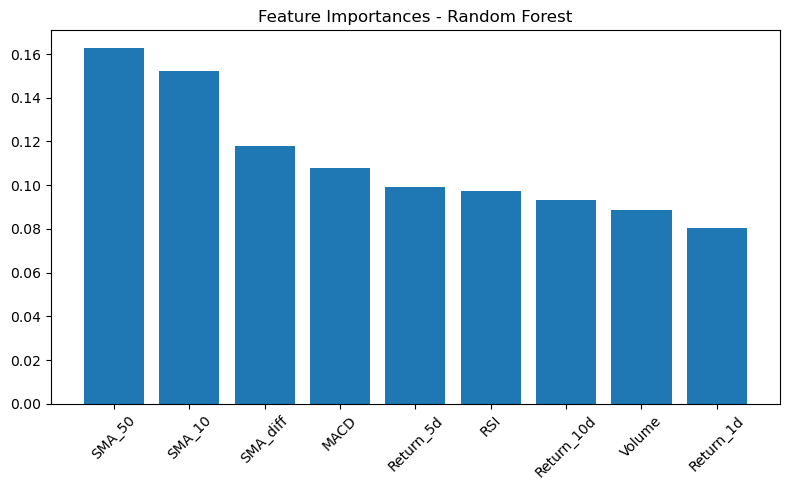

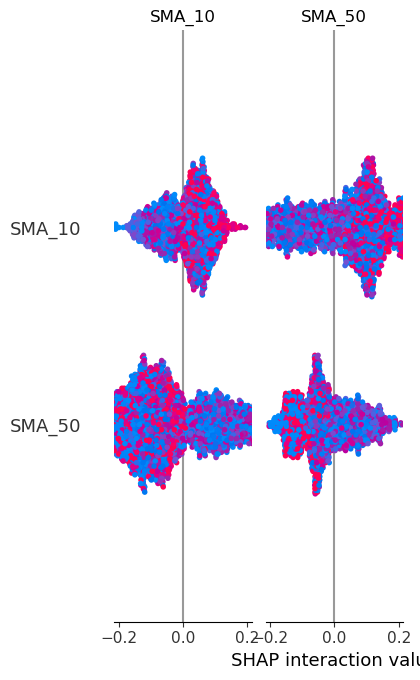

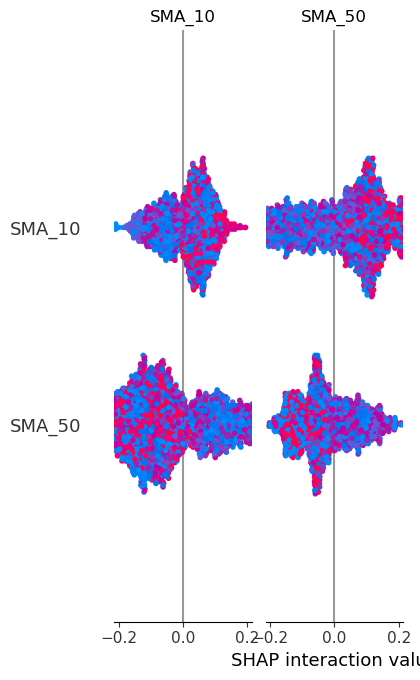

In [1]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt

# Load model and scaler
rf_model = joblib.load("models/rf_model.pkl")  # adjust path if needed
scaler = joblib.load("models/scaler.pkl")

# Load data
from app.strategy_engine.ml_classifier import fetch_ticker_data, compute_features

df = fetch_ticker_data("MSFT", period="1y")
features_df = compute_features(df)
features = features_df[['SMA_10', 'SMA_50', 'SMA_diff', 'RSI', 'MACD',
                        'Return_1d', 'Return_5d', 'Return_10d', 'Volume']]
feature_names = features.columns.tolist()

# Scale features
features_scaled = scaler.transform(features)

# 1️⃣ Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importances - Random Forest")
plt.bar(range(features_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(features_scaled.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ SHAP Analysis
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(features_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, features, feature_names=feature_names, plot_type="bar")

# Optional: SHAP detailed summary
shap.summary_plot(shap_values, features, feature_names=feature_names)
